In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
from google.colab import files
uploaded = files.upload()

Saving riceClassification.csv to riceClassification (1).csv


In [14]:
df = pd.read_csv("riceClassification.csv")
df.pop('id')

0            1
1            2
2            3
3            4
4            5
         ...  
18180    18181
18181    18182
18182    18183
18183    18184
18184    18185
Name: id, Length: 18185, dtype: int64

In [15]:
print(df.isna().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


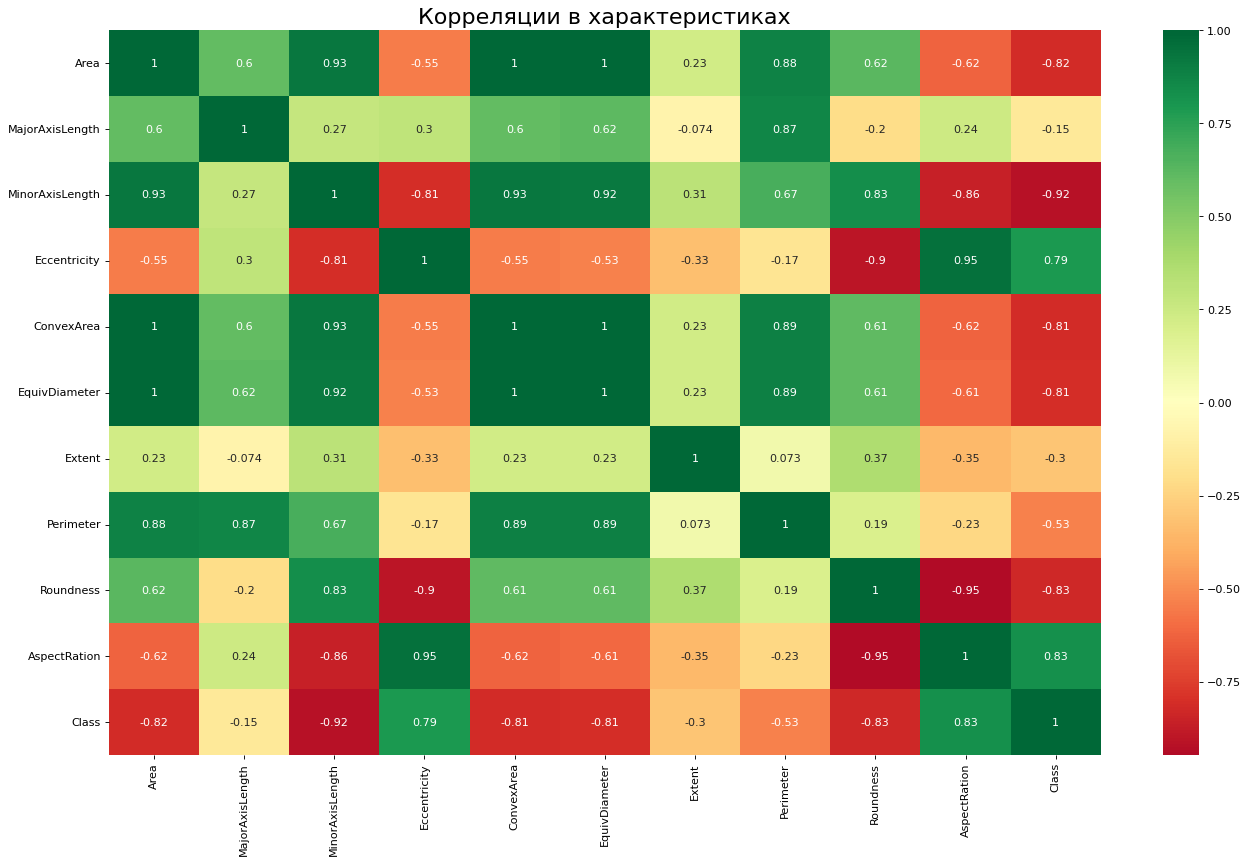

In [16]:
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [17]:
y = df['Class']
x = df.drop(columns='Class')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
w0 = model.intercept_
w1 = model.coef_
w1 = w1.reshape(-1)
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
print(w0)
mas

[-0.00312139]


[('Area', 0.005306441053575127),
 ('ConvexArea', -0.012436167600042318),
 ('Roundness', -0.02166163051453647),
 ('Extent', -0.02699827034973295),
 ('Eccentricity', -0.040974668586344784),
 ('AspectRation', -0.04612852723856768),
 ('Perimeter', 0.13255903544466238),
 ('MajorAxisLength', 0.5627762058242808),
 ('MinorAxisLength', 0.7393843745480613),
 ('EquivDiameter', -1.318374450321301)]

In [21]:
ans = str(w0)
for i in range(10):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

[-0.00312139] + 0.005306441053575127 * Area + 0.5627762058242808 * MajorAxisLength + 0.7393843745480613 * MinorAxisLength + -0.040974668586344784 * Eccentricity + -0.012436167600042318 * ConvexArea + -1.318374450321301 * EquivDiameter + -0.02699827034973295 * Extent + 0.13255903544466238 * Perimeter + -0.02166163051453647 * Roundness + -0.04612852723856768 * AspectRation


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
answers_pred = model.predict(X_test)
cm = confusion_matrix(y_test, answers_pred)
cm

array([[2431,   32],
       [  22, 2971]])

In [23]:
print('accuracy:', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
recall = cm[0][0]/(cm[0][0]+cm[1][0])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
print('recall:', recall)
print('precision:', precision)
print('f1:', 2 * (precision * recall)/(precision+recall))

accuracy: 0.9901026392961877
recall: 0.9910313901345291
precision: 0.9870077141697118
f1: 0.9890154597233524


In [ ]:
Все метрики близки к единице, значит обученная модель хорошо может предсказывать.